<table style="background-color:#F5F5F5;" width="100%">
<tr><td style="background-color:#F5F5F5;"><img src="../images/logo.png" width="150" align='right'/></td></tr>     <tr><td>
            <h2><center>Aprendizagem Automática em Engenharia Biomédica</center></h2>
            <h3><center>1st Semester - 2023/2024</center></h3>
            <h4><center>Universidade Nova de Lisboa - Faculdade de Ciências e Tecnologia</center></h4>
</td></tr>
    <tr><td><h2><b><center>Lab 4 - Linear Models</center></b></h2>
    <h4><i><b><center>Linear, Polynomial and Logistic Regression</center></b></i></h4></td></tr>
</table>

## 1. Linear Models

Linear models are one of the most simple ML techniques, used both for regression and classification. Depending on the use case, they can be trained without much effort.

These models perform statistical computations to find the line that best fits the training data, to make future predictions.


## 2. Linear Regression

Linear regression is a regression model which fits the line function that minimizes the residuals, i. e. the difference between the prediction and the real values.

<img src=https://blog.dataiku.com/hs-fs/hubfs/Willy%20Wonkas%20Candy.png width="500">

Ref: https://blog.dataiku.com/top-machine-learning-algorithms-how-they-work-in-plain-english-1

A __Simple Linear Regression__ is a model that only uses one variable to estimate the values of the target. In this example, the Age is used as feature to estimate the money spent per week in the pharmacy. 

The regression line assumes the known shape:

$$y = m*x + b$$
$$\text{\$ spent per week} = m * Age + b$$

On the other hand, a __Multiple Linear Regression__ is the model that fits a line in a multi-dimensional space, i.e. leveraging multiple variables.

$$\text{\$ spent per week} = m_1 * Age + m_2 * Income + m_3 * Comorbidities + b$$

$m_1$, $m_2$, $m_3$ and $b$ are the model parameters that weight (m) each feature and add the bias (b).

### 2.1. The Medical Cost Estimation Dataset

This dataset contains a set of features related with the characteristics of individuals, which can be used to estimate the costs with medical insurance. This is a regression problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_insurance = pd.read_csv("Data/insurance.csv")

In [2]:
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
from sklearn.model_selection import train_test_split

X = df_insurance[df_insurance.columns[:-1]]
y = df_insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
import category_encoders as ce

one_hot = ce.OneHotEncoder(cols=["region"], use_cat_names=True, return_df=True, drop_invariant=True)
one_hot.fit(X_train)
X_train = one_hot.transform(X_train)
X_test = one_hot.transform(X_test)

In [5]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
X_train[["sex", "smoker"]] = encoder.fit_transform(X_train[["sex", "smoker"]])
X_test[["sex", "smoker"]] = encoder.transform(X_test[["sex", "smoker"]])

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
X_train[X_train.columns] = scaler_X.fit_transform(X_train) 
X_test[X_test.columns] = scaler_X.transform(X_test) 

In [10]:
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten() 
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)) .flatten()

In [11]:
X_train.head()

,age,sex,bmi,children,smoker,region_southwest,region_northwest,region_northeast,region_southeast
1136,0.565217,0.0,0.243207,0.2,0.0,1.0,0.0,0.0,0.0
410,0.021739,1.0,0.040893,0.0,0.0,0.0,1.0,0.0,0.0
44,0.434783,1.0,0.567393,0.2,0.0,0.0,0.0,1.0,0.0
511,0.195652,1.0,0.476190,0.0,0.0,0.0,0.0,0.0,1.0
1167,0.239130,0.0,0.232446,0.4,0.0,1.0,0.0,0.0,0.0


### 2.2. Evaluating Regression Models

Contrarily to classification models, which can be tested evaluating hits and misses, regression models must be treated differently. Therefore, other metrics that measure the error in a continuous scale should be used.

For this purpose, it is useful to resort to the predictions' residuals for the evaluation, where we compare the estimated value to the actual one:

$$ \text{Residuals (error)} = y - \hat{y}$$

#### 2.2.1. Mean Absolute Error (MAE)

MAE is obtained by calculating the absolute difference between the model predictions and the true values, giving a measure of the magnitude of the error. A model with MAE of zero is a perfect model.

$$\text{MAE} =  \frac{1}{N}  \sum_{i=1}^N  | y_i - \hat{y}_i |$$


#### 2.2.2. Mean Square Error (MSE)

Similar to MAE, the MSE represents instead the squared difference between model prediction and true values. The errors are usually larger than MAE as the residuals are squared. Furthermore, from the quadratic behaviour, larger errors will be greatly penalized.

$$\text{MSE} =  \frac{1}{N}  \sum_{i=1}^N  ( y_i - \hat{y}_i )^2$$


#### 2.2.3. Root Mean Square Error (RMSE)

The RMSE represents the standard deviation of the residuals. This metric is more easily interpreted compared to MSE as it matches the units of the output.

RMSE provides an estimate of how large the residuals are being dispersed.


$$\text{RMSE} =  \sqrt{\frac{1}{N}  \sum_{i=1}^N  ( y_i - \hat{y}_i )^2}$$


#### 2.2.4. Coefficient of Determination (R2)

This metric evaluates the fit of the line to the dataset, thus providing a tool to compare results between different datasets. R2 represents the proportion of variance y that has been explained by the variables. In this case, the perfect model will have a R2 of one.

$$\text{R}^2 = \frac{\sum_{i=1}^N  ( y_i - \hat{y}_i )^2}{\sum_{t=1}^N  ( y_t - \overline{y}_i )^2}$$


### 2.3. Training a Linear Regression

The training of a linear regression will find the values for the model parameters that minimize the line error.

Linear regression models can be optimized using several algorithms, such as the _Least Squares estimation methods_, _Maximum-likelihood estimation_ or _Gradient Descent_.

Here, we'll resort to the Least Squares estimation method to predict the money spent weekly resorting to the Age variable only.

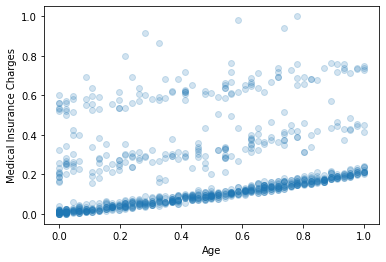

In [14]:
%matplotlib inline
plt.scatter(X_train['age'].values, y_train, alpha=.2)
plt.xlabel('Age')
plt.ylabel('Medical Insurance Charges')
plt.show()

Let's consider the equation of the linear regression:

$$\hat{y} (x_i) = m*x_i + b$$

Training our model means finding the appropriate parameters for m and b. Considering the residual of the prediction $i$ as $\varepsilon_i$, we will minimize the total residual error, resorting to the cost function $J$:

$$J(m, b) = \frac{1}{2n} \sum_{i=1}^{n} \varepsilon^2_i$$

Therefore, we must find $m$ and $b$ to which the cost function $J$ is minumum. For that purpose we'll resort to the following equations:

$$m = \frac{SS_{xy}}{SS_{xx}}\text{,   } b = \overline{y} - m \overline{x}$$

With $SS_{xy}$ the sum of cross-deviations of y and x, and $SS_{xx}$ the sum of squared deviations of x:

$$SS_{xy} = \sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y}) = \sum_{i=1}^n y_i x_i - n \overline{x} \overline{y}$$

$$SS_{xx} = \sum_{i=1}^n (x_i - \overline{x})^2 = \sum_{i=1}^n x_i^2 - n (\overline{x})^2$$


In [15]:
#Ref: https://www.geeksforgeeks.org/linear-regression-python-implementation/

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    m = SS_xy / SS_xx
    b = m_y - m*m_x
  
    return (b, m)

In [16]:
# estimating coefficients
b, m = estimate_coef(X_train['age'].values, y_train)

print("Estimated coefficients:\nb = {} \nm = {}".format(b, m))

Estimated coefficients:
b = 0.10898836215413928 
m = 0.18993976653932448


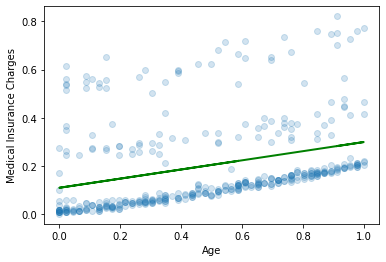

In [17]:
# predicted response vector
y_pred = b + m * X_test['age'].values

# plotting the actual points as scatter plot
plt.scatter(X_test['age'].values, y_test, alpha=.2)

# plotting the regression line
plt.plot(X_test['age'].values, y_pred, color = "g", lw=2)

plt.xlabel('Age')
plt.ylabel('Medical Insurance Charges')
plt.show()

Let's evaluate the results of our regression (although we have already an idea...)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("R2: {}".format(r2_score(y_test, y_pred)))
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("RMSE: {}".format(mean_squared_error(y_test, y_pred, squared=False)))

R2: 0.09911736828456186
MAE: 0.14055845954714652
MSE: 0.030472599032959746
RMSE: 0.1745640255979443


__What if we could resort to all features of the dataset?__


### 2.4. Exercice

__Exercice 1__: Using the Medical Insurance dataset, use all features to estimate a linear regression using Scikit-learn [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) method.

__Exercice 2__: Evaluate the results of this regression model. Does it improve? Could we accept it as model for production?

## 3. Polynomial Regression

While the Linear Regression model has some relevance in the field thanks to its simplicity, most problems are not linearly separable. This problem often leads to poorly performing regressions.

One way to address this is to resort to Polynomial Regression, which increases the order of magnitude of different variables. This allows to model a curve more fitted to the problem:

$$\hat{y} (x) = m_1*x_1 + m_2*x_1^2 + m_3*x_2 + m_4*x_2^2 + m_5*x_2^3 + b$$

<img src=https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png width="500">

### 3.1. Training a Polynomial Regression

Scikit-learn doesn't have a specific estimator for the Polynomial Regression. Instead, it allows to apply transformations to the input features, increasing the order of magnitude of the variables. 

The fitted model, although leveraging polynomial features of various degrees, is still linear!

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

poly = poly.fit(X_train)

X_train_poly = pd.DataFrame(poly.transform(X_train), columns=poly.get_feature_names_out())
X_testn_poly = pd.DataFrame(poly.transform(X_test), columns=poly.get_feature_names_out())

X_train_poly.columns

### 3.2. Exercice

__Exercice 3__: Train a new Linear Regression with the polynomial features. Evaluate the results and compare to the previous model. What do you conclude?

## 4. Logistic Regression

Dispite its name, Logistic Regression is a linear model used for __classification__. It is also known as Logit regression, and is used to estimate the probability that an instance belongs to a class. If the prediction is higher than 50%, then the output will take the positive class.

<img src=https://miro.medium.com/max/725/0*eMgJSdCcerlh__Ip.png width="600">

### 4.1. Training a Logistic Regression

This algorithm resembles its linear models class, where the coefficients of a linear function are estimated towards minimizing a cost function. However, instead of outputing prediction values, it outputs the logistic of this result.

$$\hat{y} (x_i) = \sigma{(m*x_i + b)}$$

$$\sigma(t) = \frac{1}{1 + \exp^{-t}}$$

Let's chage the objective of the Medical Insurance dataset. Instead of estimating the annual charges a person is subject to, we'll try to predic whether that person smokes or not.

In [ ]:
X_train["charges"] = y_train
y_train = X_train["smoker"]

X_train.drop("smoker", axis=1, inplace=True)

X_test["charges"] = y_test
y_test = X_test["smoker"]

X_test.drop("smoker", axis=1, inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=0)
logr = logr.fit(X_train, y_train)

### 4.2. Exercice

__Exercice 4__: Evaluate the Logistic Regression model. Which metrics are more relevant for the task?